In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

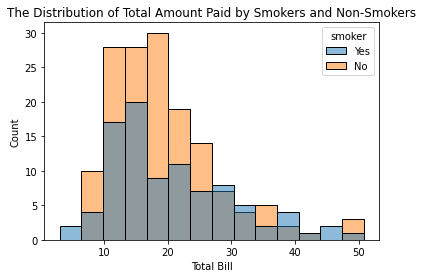

In [87]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.

sns.histplot(data = tips, x = tips["total_bill"], hue = "smoker")

plt.xlabel("Total Bill")
plt.title("The Distribution of Total Amount Paid by Smokers and Non-Smokers")
plt.show()

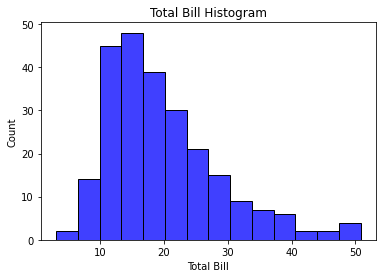

In [90]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

sns.histplot(data = "tips", x = tips["total_bill"], color="blue")

plt.xlabel("Total Bill")
plt.title("Total Bill Histogram")
plt.show()

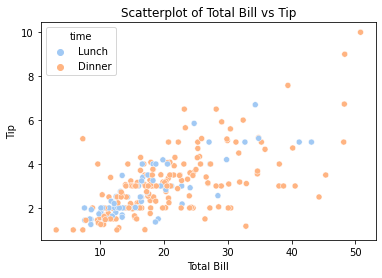

In [92]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişki yi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

sns.scatterplot(x=tips["total_bill"], y = tips["tip"], hue = tips["time"],palette="pastel")

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatterplot of Total Bill vs Tip")
plt.show()

In [27]:
tips.groupby("day")["total_bill"].mean().reset_index()

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


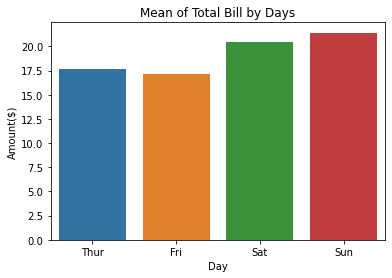

In [101]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

sns.barplot(data = tips , x = tips.groupby("day")["total_bill"].mean().reset_index()["day"], 
            y = tips.groupby("day")["total_bill"].mean().reset_index()["total_bill"])
plt.title("Mean of Total Bill by Days")
plt.xlabel("Day")
plt.ylabel("Amount($)")
plt.show()

In [103]:
tips.groupby(["day"]).total_bill.mean().values


array([17.68274194, 17.15157895, 20.44137931, 21.41      ])

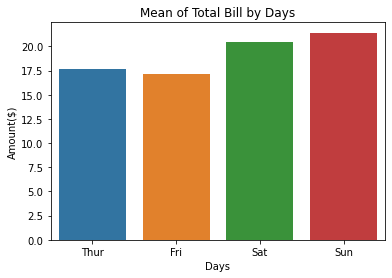

In [97]:
#2.yol
day_mean = tips.groupby(["day"]).total_bill.mean()

sns.barplot(x = day_mean.index,
            y = day_mean.values)


plt.xlabel("Days")
plt.ylabel("Amount($)")
plt.title("Mean of Total Bill by Days")
plt.show()

In [43]:
df = tips.groupby(by="day").sum()["tip"].reset_index()
df

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


In [45]:
df["tip%"] = df["tip"]/df["tip"].sum()*100
df

,day,tip,tip%
0,Thur,171.83,23.487520
1,Fri,51.96,7.102436
2,Sat,260.40,35.594193
3,Sun,247.39,33.815851


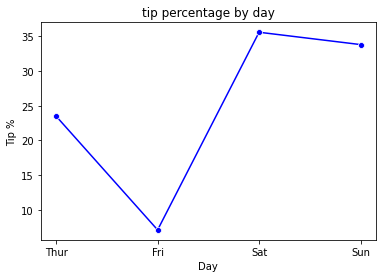

In [106]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.
sns.lineplot(data = df, x="day", y="tip%", marker = "o", color = "blue")
plt.xlabel("Day")
plt.ylabel("Tip %")
plt.title("tip percentage by day")
plt.show()


In [60]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

tips.groupby("day")["total_bill"].mean().reset_index()

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [61]:
tips.groupby("day")["tip"].mean().reset_index()

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


In [64]:
df2 = tips.groupby("day").mean()
df2

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


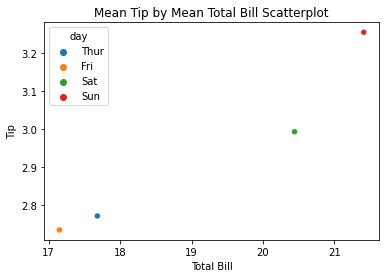

In [109]:
sns.scatterplot(data=df2, x=df2["total_bill"], y = df2["tip"], hue= "day")

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Mean Tip by Mean Total Bill Scatterplot")
plt.show()

In [71]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

df3 = tips.groupby(["smoker","day"]).sum()["tip"].reset_index()

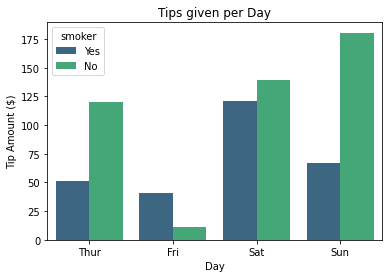

In [113]:
sns.barplot(data = df3, x="day", y="tip",hue="smoker", palette = "viridis")

plt.xlabel("Day")
plt.ylabel("Tip Amount ($)")
plt.title("Tips given per Day")
plt.show()

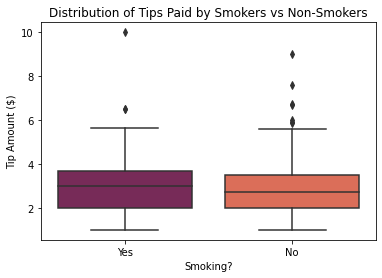

In [116]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

sns.boxplot(data =tips, x="smoker", y="tip",palette = "rocket" )

plt.xlabel("Smoking?")
plt.ylabel("Tip Amount ($)")
plt.title("Distribution of Tips Paid by Smokers vs Non-Smokers")
plt.show()

In [ ]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.



Text(0.5, 1.0, 'Boxplot of Tips by smoker')

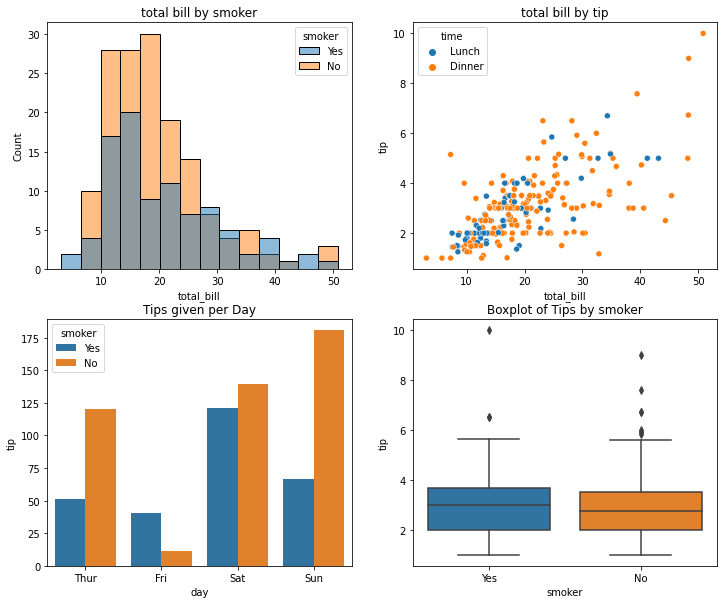

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data = tips, 
             x = tips["total_bill"], 
             hue = "smoker",
             ax=axes[0,0]
             )


sns.scatterplot(x=tips["total_bill"], 
                y = tips["tip"], 
                hue = tips["time"],
                ax=axes[0,1]
                )

sns.barplot(data = df3, 
            x="day", 
            y="tip",
            hue="smoker",
            ax=axes[1,0])


sns.boxplot(data =tips, 
            x="smoker", 
            y="tip",
            ax=axes[1,1]
            )


axes[0, 0].set_title("total bill by smoker")
axes[0, 1].set_title("total bill by tip")
axes[1, 0].set_title("Tips given per Day")
axes[1, 1].set_title("Boxplot of Tips by smoker")

<AxesSubplot:xlabel='smoker', ylabel='tip'>

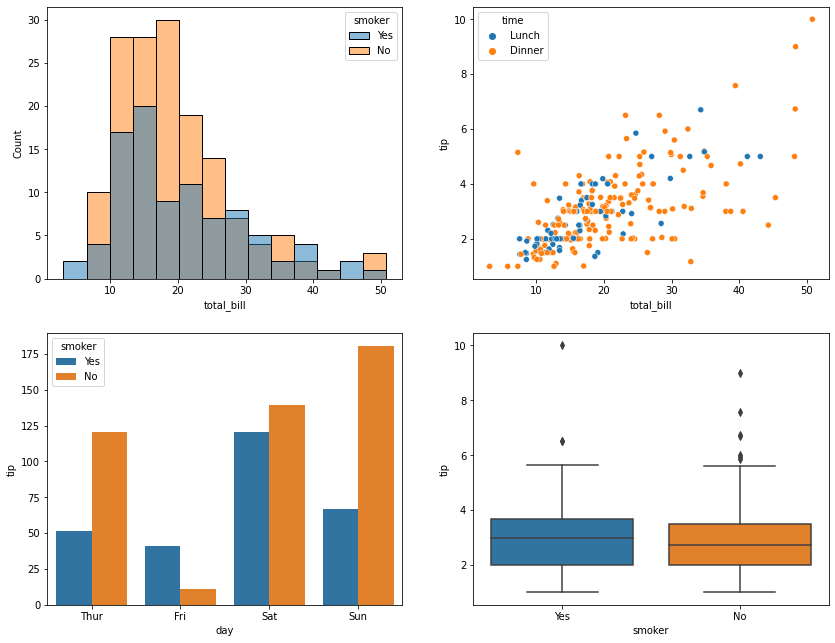

In [84]:
plt.figure(figsize=(14,11))

plt.subplot(2,2,1)
sns.histplot(data = tips, 
             x = tips["total_bill"], 
             hue = "smoker"
             )

plt.subplot(2,2,2)
sns.scatterplot(x=tips["total_bill"], 
                y = tips["tip"], 
                hue = tips["time"]
                )

plt.subplot(2,2,3)
sns.barplot(data = df3, 
            x="day", 
            y="tip",
            hue="smoker")

plt.subplot(2,2,4)
sns.boxplot(data =tips, 
            x="smoker", 
            y="tip"
            )